# Diabetes Prediction Model

In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [2]:
# Importing data from csv file

data = pd.read_csv("diabetes.csv")

In [3]:
# Checking dataset

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [4]:
data.shape

(768, 9)

In [5]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
!pip install impyute
import sys
from impyute.imputation.cs import fast_knn

In [11]:
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# Start the KNN training
imputed_training=fast_knn(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)
data_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656910,72.427685,29.157087,155.546401,32.439657,0.471876,33.240885,0.348958
std,3.369578,30.442442,12.102298,8.804400,85.021472,6.877355,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.233609,155.548223,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.844435,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Diabetes Patient')

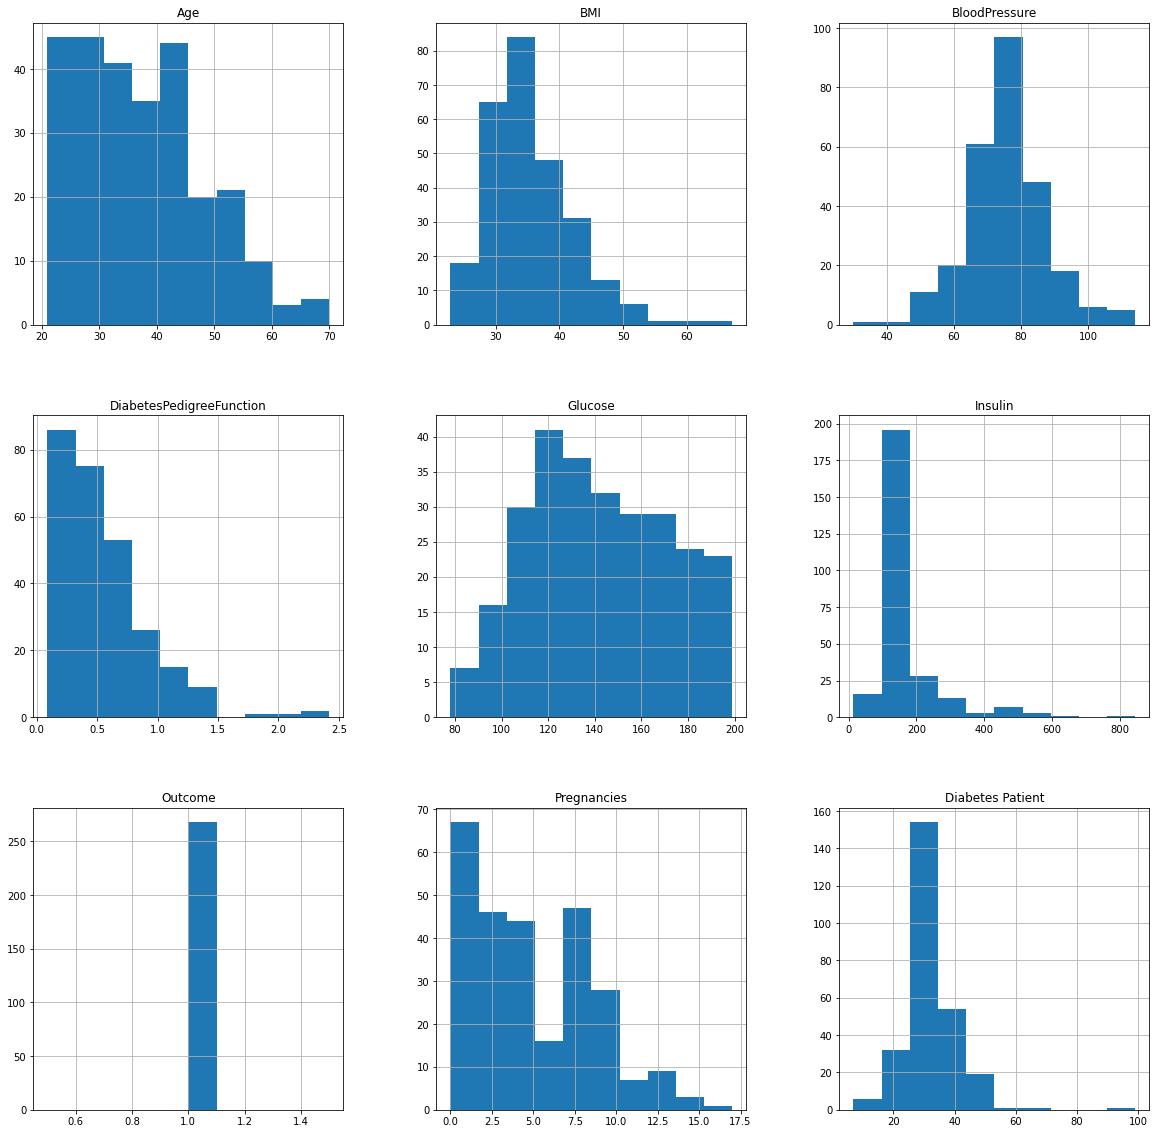

In [14]:
# Data Visualization

p = data[data['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

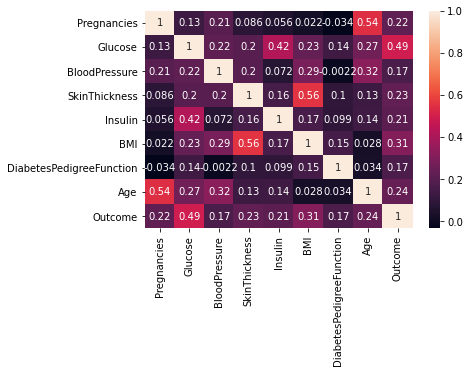

In [15]:
sns.heatmap(data.corr(),annot=True)

## Splitting data in training and testing datasets

In [16]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
train, test = train_test_split(data, test_size = test_size, random_state = seed)

In [17]:
train.shape , test.shape , data.shape

((576, 9), (192, 9), (768, 9))

In [18]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
235,4,171.0,72.0,29.285805,155.808334,43.6,0.479,26,1
576,6,108.0,44.0,20.000000,130.000000,24.0,0.813,35,0
22,7,196.0,90.0,29.786750,155.133787,39.8,0.451,41,1
451,2,134.0,70.0,29.602275,155.548223,28.9,0.542,23,1
616,6,117.0,96.0,28.169098,155.164315,28.7,0.157,30,0


In [19]:
train_X = train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
train_y = train[['Outcome']]

test_X = test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
test_y = test[['Outcome']]

In [20]:
model = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
#model = LogisticRegression(random_state = 10, max_iter = 1000)
model.fit(train_X,train_y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=10)

In [21]:
model.predict_proba(test_X)

array([[0.28054643, 0.71945357],
       [0.61449708, 0.38550292],
       [0.3510178 , 0.6489822 ],
       [0.87915693, 0.12084307],
       [0.84036191, 0.15963809],
       [0.93875993, 0.06124007],
       [0.8780674 , 0.1219326 ],
       [0.5563364 , 0.4436636 ],
       [0.91689489, 0.08310511],
       [0.48257981, 0.51742019],
       [0.91207205, 0.08792795],
       [0.65069208, 0.34930792],
       [0.0294118 , 0.9705882 ],
       [0.52276719, 0.47723281],
       [0.83516306, 0.16483694],
       [0.15810464, 0.84189536],
       [0.10117496, 0.89882504],
       [0.91400267, 0.08599733],
       [0.83394315, 0.16605685],
       [0.02839489, 0.97160511],
       [0.56582999, 0.43417001],
       [0.34525679, 0.65474321],
       [0.48385166, 0.51614834],
       [0.74636999, 0.25363001],
       [0.79570821, 0.20429179],
       [0.14986982, 0.85013018],
       [0.54132439, 0.45867561],
       [0.37113666, 0.62886334],
       [0.33422234, 0.66577766],
       [0.08102035, 0.91897965],
       [0.

In [22]:
model.predict(test_X)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
pred1 = model.predict(test_X)

In [24]:
con_mat1 = confusion_matrix(test_y, pred1)
print(con_mat1)

[[92 29]
 [22 49]]


In [25]:
pred = model.predict(test_X)
labels = [1, 0]
con_mat = confusion_matrix(test_y, pred, labels = labels )
print(con_mat)

[[49 22]
 [29 92]]


In [26]:
accuracy=(con_mat[0,0] + con_mat[1,1])/test_y.size
print(accuracy)
print(model.score(test_X, test_y))
#np.mean(test_y == pred)

0.734375
0.734375


In [27]:
actual = test_y
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       121
           1       0.63      0.69      0.66        71

    accuracy                           0.73       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.74      0.73      0.74       192



## Saving a pickle model to use it again

In [30]:
import pickle

filename = 'diabetes.pkl'
# open a file, where you ant to store the data
pickle.dump(model,open(filename,'wb'))

In [34]:
loaded_model = pickle.load(open(filename,'rb'))

In [35]:
result = loaded_model.score(test_X,test_y)
print(result)

0.734375
